

# Project: Investigation of Medical Appointments No-show Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I selected **No-show Appointments** dataset as my investigation of dataset project .
>
> **No-show Appointments** dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row
>
> **Column names in this dataset and their significance:**
> 
> _PatientId_: Identification of a patient
>
> _AppointmentID_: Identification of each appointment
>
> _Gender_: Male or Female
>
> _ScheduledDay_: The day of the actual appointment, when they have to visit the doctor.
>
> _AppointmentDay_: The day someone called or registered the appointment, this is before the appointment of course.
>
> _Age_: How old is the patient.
>
> _Neighbourhood_: Where the appointment takes place.
>
> _Scholarship_: indicates whether or not the patient is enrolled in Brazilian welfare program Bolsa Família. Bolsa Família was a social welfare program of the Government of Brazil, part of the Fome Zero network of federal assistance programs. Bolsa Família provided financial aid to poor Brazilian families. To be eligible for this program, families had to ensure that children attend school and get vaccinated.
>
> _Hipertension_: True or False
>
> _Diabetes_: True or False
>
> _Alcoholism_: True or False
>
> _Handcap_: True or False
>
> _SMS_received_: Indicates 1 or more messages sent to the patient.
>
> _No-show_: Indicates whether the patient showed up for an appointment or not. “No” if the patient showed up, “Yes” if the patient did not show up. 


### Questions for Analysis
> 1. Does sending of sms improve medical appointment's show up rate?<br>
> 2. Is suffering from diabetes asscoiated with higher medical appointment's show up rate?<br>
> 3. Which gender is most affected by hypertension? 



In [78]:
# import modules 

import pandas as pd # for data analysis and manipulation
import numpy as np # for data manipulation
import matplotlib as plt # for data visualization

# to display plot in jupyter notebook
%matplotlib inline 



<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [79]:
# load data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# View the first five row

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [80]:
# view the shape of the dataset

print(f'number of row is {df.shape[0]}', f' and number of column is {df.shape[1]}')

number of row is 110527  and number of column is 14


In [81]:
# check for data type
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [82]:
# check if there is any missing value

df.isnull().sum().any()

False

In [83]:
# check for duplicates

df.duplicated().any()

False

In [84]:
# view the summary statistics

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [85]:
# view the appointment days

df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

#### Structure and identified problems in the dataset

> No duplicated values <br>
> No null values <br>
> Some column names are mispelled <br>
> Patient mean age is approxiamtely 37. There is a wrong value i.e -1 entered as a patient's age <br> 
> About 32% received sms<br>
> About 7.2% have diabetes<br>
> About 10% of the patients have scholarship<br>
> About 19.7% have hypertention<br>
> About 3% are alcoholics<br>
> About 2% are with handicap<br>
> The dataset contains medical appointments record of only the patients that registered in April, May and June of 2016. 



### Data Cleaning

 

In [86]:
# change column names to lower case for ease of analysis

df.columns = df.columns.str.lower()

In [87]:
# check if the names are now in lower case

df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [88]:
# drop columns that are not needed for the analysis i.e patientid, appointmentid

df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

In [89]:
# see the new table

df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [90]:
# correct mispelled column names

df.rename(columns={'hipertension':'hypertension', 'handcap' : 'handicap'}, inplace=True)

# confirm the changes

df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [91]:
# delete row with wrong age value

wrong_age = df[df['age'] == -1].index # index of the row with wrong age value

df.drop(wrong_age, inplace=True) # delete row


In [92]:
# confirm whether the row has been remove or not

df[df['age'] == -1].sum().any()

False

In [93]:
# Reverse no-show column and its values to avoid confusion

df.rename(columns={'no-show':'show_up'}, inplace=True) # reverse the name

In [94]:
# see the new table

df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> **Note:** As it stands, 'No' means the patient showed up. 

In [95]:
# change the data type of the values in show_up column so that No now changes to 1 and Yes 0.

df['show_up'] = df['show_up'].apply(lambda x: 1 if x=='No' else 0 )


In [96]:
# confirm changes

df['show_up'].value_counts().index

Int64Index([1, 0], dtype='int64')

In [97]:
# let's drop time related columns i.e scheduledday and appointmentday columns to focus on the features we are interested in.

df.drop(['scheduledday', 'appointmentday'], axis=1, inplace=True)

In [98]:
# confirm changes

df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis




### 1. Does sending of sms improve medical appointments' show up rate?

In [99]:
# first, let's create user-friendly functions we will use throughout our analysis

# create a function that calculates proportion for each items in a variable
def Prop(df, Var):
    '''
    docstring: The fuction calculates each item in a variable as a proportion of the total 
    and return a Series that contains the values
    
    input:
        df: the dataframe
        Var: The variable 
         
    output: A Series that shows each item as a proportion
    
    '''
    
    return df[Var].value_counts()/df[Var].value_counts().sum()

In [100]:
# create a function that calculate the mean of of each item in a variable group by other variable

def groupbyProb(df, grVar, Var):
    '''
    docstring: The fuction calculates the mean of each item in a variable as a proportion of the total when grouped by another variable 
    and return a Series that contains the values
    
    input:
         df: the dataframe
         grVar: group by variable
         Var: The variable whose items we want to find their means
    output: A Series that shows each item as a proportion
    
    '''
    
    return df.groupby(grVar).mean()[Var]

In [101]:
# create a function that plots a bar chart

def plotBarChart(df, Var, location = [1,2], labels = ['No', 'Yes'], color = ('#000080', '#ff9505')):
     
    '''
    docstring: This function plots a bar chart of the proportion of items in a categorical variable.
    
    inputs:
          Var: The categorical variable
          location: default location of the variable items on x-axis
          labels: default labels for each item
          color: color of the bars. It's optional and it's the default
    output: A bar chart depicting the proportion of a given variable ''' 
    
    #plot chart
    plt.pyplot.bar(location,[Prop(df,Var)[0], Prop(df,Var)[1]],  tick_label = labels, color = color )
    
    # tidy up  labels
    Var = Var.replace("_", " ")
    
    # add a title
    plt.pyplot.title(f'Proportion of {Var}'.title(), fontsize = 12, weight = 'bold')
    
    #add labels
    plt.pyplot.xlabel(Var.title(), fontsize = 12, weight = 'bold')
    plt.pyplot.ylabel('Ratio', fontsize = 12, weight = 'bold');
    
    
                             

In [102]:
# create a function that plots a bar chart for group by variable 

def plotGroupBar(df, grVar, Var, location = [1,2], labels = ['No', 'Yes'], color = ('#000080', '#ff9505')):
     
    '''
    docstring: This function plots a bar chart of the proportion of grouped variable.
    
    inputs:
          grVar: group by variable
          Var: The variable whose items we want to find their means
          location: default location of the variable items on x-axis
          labels: default labels for each item
          color: color of the bars. It's optional and it's the default
    output: A bar chart depicting the proportion of a given variable ''' 
    
    # plot a chart
    plt.pyplot.bar(location,[groupbyProb(df,grVar,Var)[0], groupbyProb(df,grVar,Var)[1]],  tick_label = labels, color = color )
    
     # tidy up  labels
    Var = Var.replace("_", " ")
    grVar = grVar.replace("_", " ")
    
    # add a title
    plt.pyplot.title(f'Proportion of {Var} group by {grVar}'.title(), fontsize = 12, weight = 'bold')
    
    # add labels
    plt.pyplot.xlabel(grVar.title(), fontsize = 12, weight = 'bold')
    plt.pyplot.ylabel(f'Proportion of {Var}'.title(), fontsize = 12, weight = 'bold');

In [103]:
# proportion of people that showed up

show_prop = Prop(df, 'show_up')

show_prop

1    0.798066
0    0.201934
Name: show_up, dtype: float64

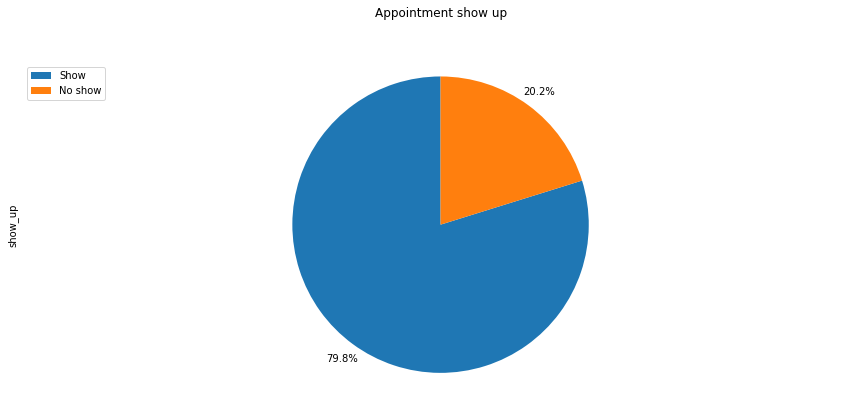

In [104]:
# create a pie chart with proper labels

show_prop.plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=False,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12)            # the ratio between the pie center and start of text label

# scale the title up by 12% to match pctdistance
plt.pyplot.title('Appointment show up', y=1.12) 
plt.pyplot.axis('equal') 

# add legend
plt.pyplot.legend(labels=['Show', 'No show'], loc='upper left');

79.8% of patients showed up while 20.2% missed their medical appointment.

In [105]:
# proportion of people that received an sms

Prop(df, 'sms_received')

0    0.678971
1    0.321029
Name: sms_received, dtype: float64

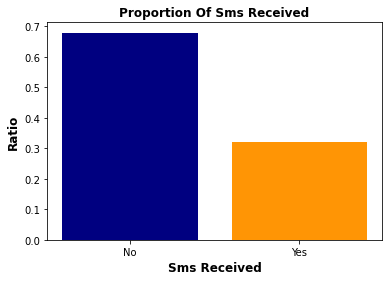

In [106]:
# Create a bar chart with proper labels

plotBarChart(df, 'sms_received')


67% of total people did not received an sms. Only 32% of them did. 

In [107]:
# show up rate by sms received

groupbyProb(df,'sms_received', 'show_up' )

sms_received
0    0.832965
1    0.724255
Name: show_up, dtype: float64

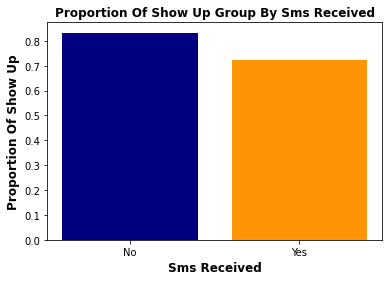

In [108]:
# Create a bar chart with proper labels

plotGroupBar(df,'sms_received', 'show_up')

People that did not receive sms are more likely to show for medical appointments. They have a show up rate of 83% compared to 72%  show up rate of those that received sms.

### 2. Is suffering from diabetes asscoiated with higher medical appointment's show up rate?

In [109]:
# proportion of patients that are with diabetes.

diabetics_prop = Prop(df,'diabetes')

diabetics_prop

0    0.928135
1    0.071865
Name: diabetes, dtype: float64

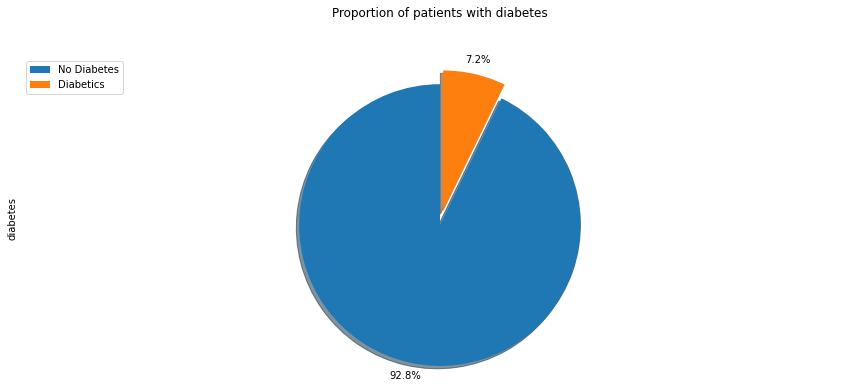

In [110]:
# create a pie chart with proper labels
explode_list = [0.0, 0.1] # ratio with which to offset each wedge.

diabetics_prop.plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.1,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' the proportion of patients with diabetes
                                )

# scale the title up by 10% to match pctdistance
plt.pyplot.title('Proportion of patients with diabetes', y=1.1) 
plt.pyplot.axis('equal') 

# add legend
plt.pyplot.legend(labels=['No Diabetes', 'Diabetics'], loc='upper left');

7.2% of patients are with diabetes. 

In [111]:
# show up rate by diabetes

groupbyProb(df,'diabetes', 'show_up' )

diabetes
0    0.796370
1    0.819967
Name: show_up, dtype: float64

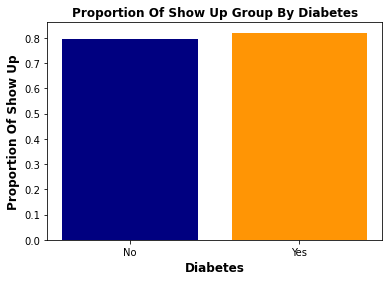

In [112]:
# Create a bar chart with proper labels

plotGroupBar(df,'diabetes', 'show_up')

The appointment show up rate for people with diabetes is slightly higher (about 3%) than those with no diabetes. 
Show up rate for diabetics patients is approximately 81.9%, and approximately 79.6% for people with no diabetes.

### 3. Which gender is most affected by hypertension?

In [113]:
# proportion of male and female 

Prop(df, 'gender')

F    0.649974
M    0.350026
Name: gender, dtype: float64

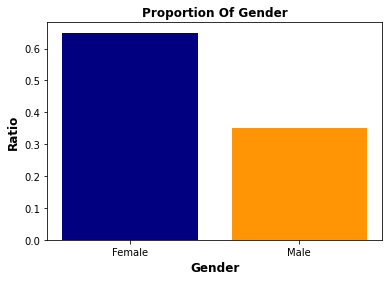

In [114]:
# Create a bar chart with proper labels

plotBarChart(df, 'gender', labels = ['Female', 'Male'])


About 65% of patients are female and male patients make up 35% of the sample. 

In [115]:
# proportion of male and female by hypertension

groupbyProb(df,'gender', 'hypertension')

gender
F    0.213519
M    0.167033
Name: hypertension, dtype: float64

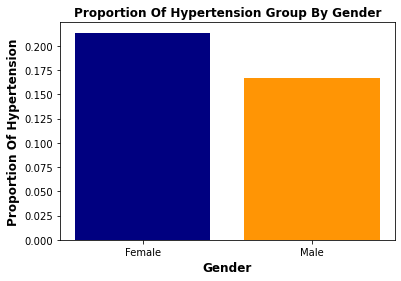

In [117]:
# Create a bar chart with proper labels

plotGroupBar(df,'gender', 'hypertension', labels = ['Female', 'Male'])


21% of female and about 17% of male patients have hypertension. Hypetension is slightly higher among female patients. 

<a id='conclusions'></a>
## Conclusions

> The findings from the above analysis shows that
> 79.8% of the patients showed up while 20.2% missed their medical appointment. <br>
>
> Only 32% of the patients received an sms message and 67% of them did not. People that did not receive sms have a show up rate of 83% compared to 72% show up rate of those that received sms. Our finding shows that people that did not receive sms are more likely to show for medical appointments.<br>
>
> Diabetics patients make up 7.2 percent of those registered for medical appointments.
> The appointment show up rate among people with diabetes is slightly higher than those with no diabetes. People with diabetes have a show rate of 81.9%, and 79.6% for people with no diabetes.<br>
>
> About 65% of patients are female and male patients make up 35% of the sample.
> Hypertension is slightly higher among female patients. 21% of female patients and  17% of male patients have hypertention. That is one out every five female patients has hypertension.  <br>

> The limitation of this analysis is insufficient data. The dataset contains appointment records of only the patients that registered for appointments in April, May and June of 2016. 

